In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('etuovi_asunnot.csv')

### Dropping rows with '-1' in them. (They didn't have any info)

In [4]:
df=df[df['Hinta'] != '-1']

### Getting part of the city. Street address is not that relevant

In [5]:
df['Asunnon tyyppi'] = df['Asunnon tyyppi'].apply(lambda x: x.split(" ")[0])

In [6]:
df.rename(columns={'Sijanti': 'Sijainti'},inplace=True)

In [7]:
df['Sijainti'] = df['Sijainti'].apply(lambda x: x.split(",")[1])

#### Price to numerical

In [9]:
df['Hinta'] = df['Hinta'].apply(lambda x: x.replace("€", "").replace(" ", "").replace(",", "."))


In [81]:
df['Hinta'].apply(lambda x: float(x))


0       307000.0
1        76000.0
2       127000.0
3       209000.0
4        89000.0
          ...   
1911     83000.0
1912    167475.0
1914    193000.0
1916     79000.0
1917     49000.0
Name: Hinta, Length: 1185, dtype: float64

#### Size to numerical

In [82]:
df['Koko'] = df['Koko'].apply(lambda x: x.replace("m²","").strip().replace(",","."))
df['Koko'].apply(lambda x: float(x))


0       102.0
1        54.0
2        64.0
3        44.0
4        35.0
        ...  
1911     21.5
1912     43.5
1914     72.0
1916     91.5
1917     33.0
Name: Koko, Length: 1185, dtype: float64

#### Construction year to numerical

In [16]:
df['Rakennus vuosi'] = df['Rakennus vuosi'].replace("-", -1)


In [18]:
df['Rakennus vuosi'].apply(lambda x: int(x))

0       2016
1       1965
2       1980
3       2008
4       1955
        ... 
1911    2018
1912    2019
1914    1960
1916    1984
1917    1983
Name: Rakennus vuosi, Length: 1185, dtype: int64

In [19]:
hinta_kohde = pd.pivot_table(df, index = 'Sijainti', values = 'Hinta', aggfunc = 'first')

### [x] TODO: Esim. sijaintia vastaava keskiarvo hinnalle

In [80]:
group_price = df.groupby("Sijainti").mean()

In [52]:
group_price.head(20)

,Hinta
Sijainti,
40100,171000.000000
Aholaita,81750.000000
Ainola,222405.567500
Ainolanranta,223068.333333
Aittorinne,127025.345556
Asmalampi,109000.000000
Haapala,62900.000000
Haapaniemi,117209.090909
Halssila,149886.318182


## Price per location

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


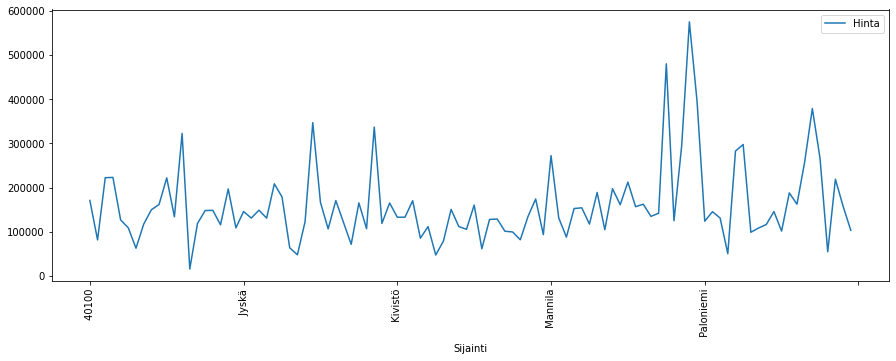

In [75]:
ax = plt.gca()
#df['Hinta'] = df.Hinta.astype(float)
group_price.head(100).plot(kind='line', y='Hinta', ax=ax, figsize=(15, 5))
plt.xticks(rotation=90)
plt.show()

In [78]:
group_constyear = df.groupby("Rakennus vuosi").mean()
group_constyear = group_constyear.drop(-1)


## Price per construction year

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


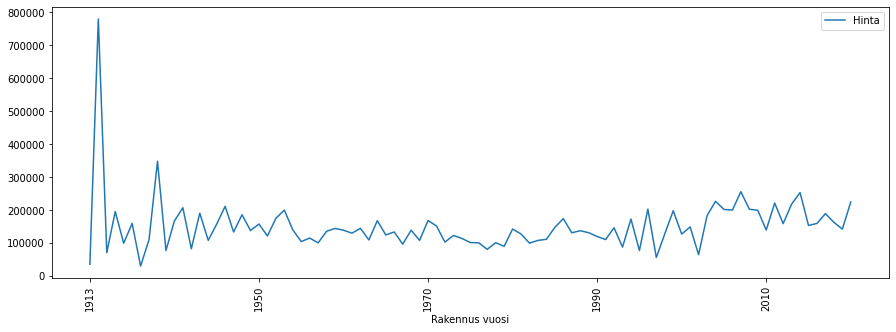

In [74]:
ax = plt.gca()

group_constyear.head(100).plot(kind='line', y='Hinta', ax=ax, figsize=(15, 5))
plt.xticks(rotation=90)
plt.show()